_S25: Computational Psycholinguistics_

Team Project

Swarang Joshi, 2022114010

Pranav Agarwal, 2021113018

# Compund Analysis: Association Strength

In [1]:
import json
import pandas as pd
from scipy.stats import spearmanr
from matplotlib import pyplot as plt
from sklearn.linear_model import Lasso

## Loading the Data

In [2]:
# Load JSON data
with open('data/ea-thesaurus.json', 'r') as file:
    thesaurus = json.load(file)

def get_association(thesaurus, word1, word2):
    """
    Get the association of a term from the thesaurus.
    """
    for entry in thesaurus[word1]:
        if word2 in entry.keys():
            return int(entry[word2])
    return 0

In [3]:
# Load the CSV data
compounds_glove_df = pd.read_csv("./data/compounds_glove.csv")
compounds_bert_df = pd.read_csv("./data/compounds_bert.csv")
compounds_df = pd.merge(
    compounds_glove_df, compounds_bert_df,
    on=['Compound','left','right', 'TRAN', 'LMD'], how='inner'
)
compounds_df

,Compound,left,right,TRAN,LMD,glove_LMD,glove_TRAN,bert_LMD,bert_TRAN
0,aboveground,above,ground,6.200000,4.000000,5.176486,0.879524,3.042942,4.758105
1,airbase,air,base,4.266667,5.866667,5.454429,3.403150,5.578537,3.638881
2,airborne,air,borne,3.857143,3.133333,4.191957,2.894971,5.499195,5.501530
3,aircraft,air,craft,4.533333,4.266667,4.360665,4.090656,4.826679,4.550915
4,airfield,air,field,4.333333,5.714286,4.356041,2.900640,5.448549,3.643667
...,...,...,...,...,...,...,...,...,...
618,wordplay,word,play,4.928571,3.533333,4.075371,1.622669,4.555252,4.359366
619,worldwide,world,wide,4.928571,3.066667,4.186401,3.361379,5.166740,5.063019
620,wristwatch,wrist,watch,6.266667,6.333333,4.221955,2.503287,4.206198,4.139773
621,yardstick,yards,tick,5.866667,5.333333,5.442741,1.236868,4.045908,4.334155


In [4]:
# Find the index of the rows which dont have a pair of words in the thesaurus
absent_pairs = []
for index, row in compounds_df.iterrows():
    word1 = row['left']
    word2 = row['right']
    if word1.upper() not in thesaurus.keys():
        # print(f"Word (L) '{word1}' not found in thesaurus.")
        absent_pairs.append(index)
    elif word2.upper() not in thesaurus.keys():
        # print(f"Word (R) '{word2}' not found in thesaurus.")
        absent_pairs.append(index)
    else:
        compounds_df.loc[index,'association'] = get_association(thesaurus, word1.upper(), word2.upper())

print(f"Number of absent pairs: {len(absent_pairs)}")

Number of absent pairs: 52


In [5]:
# Drop the absent pairs from the dataframe
compounds_df = compounds_df.drop(absent_pairs)
compounds_df = compounds_df.reset_index(drop=True)
compounds_df

,Compound,left,right,TRAN,LMD,glove_LMD,glove_TRAN,bert_LMD,bert_TRAN,association
0,aboveground,above,ground,6.200000,4.000000,5.176486,0.879524,3.042942,4.758105,0.0
1,airbase,air,base,4.266667,5.866667,5.454429,3.403150,5.578537,3.638881,0.0
2,airborne,air,borne,3.857143,3.133333,4.191957,2.894971,5.499195,5.501530,0.0
3,aircraft,air,craft,4.533333,4.266667,4.360665,4.090656,4.826679,4.550915,3.0
4,airfield,air,field,4.333333,5.714286,4.356041,2.900640,5.448549,3.643667,0.0
...,...,...,...,...,...,...,...,...,...,...
566,wordplay,word,play,4.928571,3.533333,4.075371,1.622669,4.555252,4.359366,0.0
567,worldwide,world,wide,4.928571,3.066667,4.186401,3.361379,5.166740,5.063019,10.0
568,wristwatch,wrist,watch,6.266667,6.333333,4.221955,2.503287,4.206198,4.139773,46.0
569,yardstick,yards,tick,5.866667,5.333333,5.442741,1.236868,4.045908,4.334155,0.0


In [6]:
# Count the number of entries with association 0
count_association_0 = (compounds_df['association'] == 0).sum()
print(f"Number of entries with association 0: {count_association_0}")

Number of entries with association 0: 198


## Correlation

In [7]:
# Finding Spearman correlation between the association and LMD and ST

corr_lmd = spearmanr(compounds_df['association'], compounds_df['LMD'])
corr_st = spearmanr(compounds_df['association'], compounds_df['TRAN'])

corr_lmd_glove = spearmanr(compounds_df['association'], compounds_df['glove_LMD'])
corr_st_glove = spearmanr(compounds_df['association'], compounds_df['glove_TRAN'])

corr_lmd_bert = spearmanr(compounds_df['association'], compounds_df['bert_LMD'])
corr_st_bert = spearmanr(compounds_df['association'], compounds_df['bert_TRAN'])

print(f"Spearman correlation between association")
print(f"\tand LMD:\t{corr_lmd[0]:.4f}, p-value: {corr_lmd[1]:.4f}")
print(f"\tand ST:\t{corr_st[0]:.4f}, p-value: {corr_st[1]:.4f}")
print(f"\tand LMD (Glove):\t{corr_lmd_glove[0]:.4f}, p-value: {corr_lmd_glove[1]:.4f}")
print(f"\tand ST (Glove):\t{corr_st_glove[0]:.4f}, p-value: {corr_st_glove[1]:.4f}")
print(f"\tand LMD (Bert):\t{corr_lmd_bert[0]:.4f}, p-value: {corr_lmd_bert[1]:.4f}")
print(f"\tand ST (Bert):\t{corr_st_bert[0]:.4f}, p-value: {corr_st_bert[1]:.4f}")

Spearman correlation between association
	and LMD:	-0.0719, p-value: 0.0860
	and ST:	0.2365, p-value: 0.0000
	and LMD (Glove):	-0.2415, p-value: 0.0000
	and ST (Glove):	0.2300, p-value: 0.0000
	and LMD (Bert):	-0.0536, p-value: 0.2008
	and ST (Bert):	0.0281, p-value: 0.5027


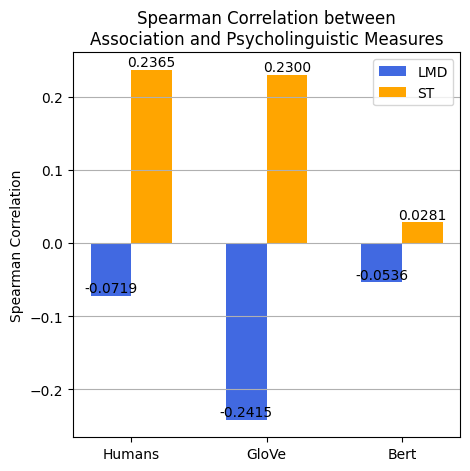

In [ ]:
n_bars = 3
width = 0.6 - n_bars * 0.1
lmd_values = [corr_lmd[0], corr_lmd_glove[0],  corr_lmd_bert[0]]
st_values = [corr_st[0], corr_st_glove[0], corr_st_bert[0]]

plt.figure(figsize=(5, 5))
plt.bar(range(n_bars), lmd_values, width=width, color='royalblue', label='LMD')
for i, v in enumerate(lmd_values):
    plt.text(i, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')

plt.bar([x + width for x in range(n_bars)], st_values, width=width, color='orange', label='ST')
for i, v in enumerate(st_values):
    plt.text(i + width, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')
  
plt.xticks([x + width / 2 for x in range(n_bars)], ['Humans', 'GloVe', 'Bert'])
plt.grid(axis = 'y')
plt.ylabel('Spearman Correlation')
plt.title('Spearman Correlation between\nAssociation and Psycholinguistic Measures')
plt.legend()
plt.show()


## Training Regressor Predicting LMD and ST

In [9]:
# Fitting Regressors 
train_set = compounds_df.sample(frac=0.7, random_state=42)
test_set = compounds_df.drop(train_set.index) 

In [10]:
association_lmd_model = Lasso()
association_lmd_model.fit(train_set[['association']], train_set['LMD'])

association_st_model = Lasso()
association_st_model.fit(train_set[['association']], train_set['TRAN'])

association_glove_lmd_model = Lasso()
association_glove_lmd_model.fit(train_set[['association']], train_set['glove_LMD'])

association_glove_st_model = Lasso()
association_glove_st_model.fit(train_set[['association']], train_set['glove_TRAN'])

association_bert_lmd_model = Lasso()
association_bert_lmd_model.fit(train_set[['association']], train_set['bert_LMD'])

association_bert_st_model = Lasso()
association_bert_st_model.fit(train_set[['association']], train_set['bert_TRAN'])

Lasso()

In [11]:
# Predict on the test set
# Get R^2 score for both models
lmd_r2 = association_lmd_model.score(test_set[['association']], test_set['LMD'])
st_r2 = association_st_model.score(test_set[['association']], test_set['TRAN'])
glove_lmd_r2 = association_glove_lmd_model.score(test_set[['association']], test_set['glove_LMD'])
glove_st_r2 = association_glove_st_model.score(test_set[['association']], test_set['glove_TRAN'])
bert_lmd_r2 = association_bert_lmd_model.score(test_set[['association']], test_set['bert_LMD'])
bert_st_r2 = association_bert_st_model.score(test_set[['association']], test_set['bert_TRAN'])

# Get MAE for both models
lmd_mae = ((test_set['LMD'] - association_lmd_model.predict(test_set[['association']]))).abs().mean()
st_mae = ((test_set['TRAN'] - association_st_model.predict(test_set[['association']]))).abs().mean()
glove_lmd_mae = ((test_set['glove_LMD'] - association_glove_lmd_model.predict(test_set[['association']]))).abs().mean()
glove_st_mae = ((test_set['glove_TRAN'] - association_glove_st_model.predict(test_set[['association']]))).abs().mean()
bert_lmd_mae = ((test_set['bert_LMD'] - association_bert_lmd_model.predict(test_set[['association']]))).abs().mean()
bert_st_mae = ((test_set['bert_TRAN'] - association_bert_st_model.predict(test_set[['association']]))).abs().mean()


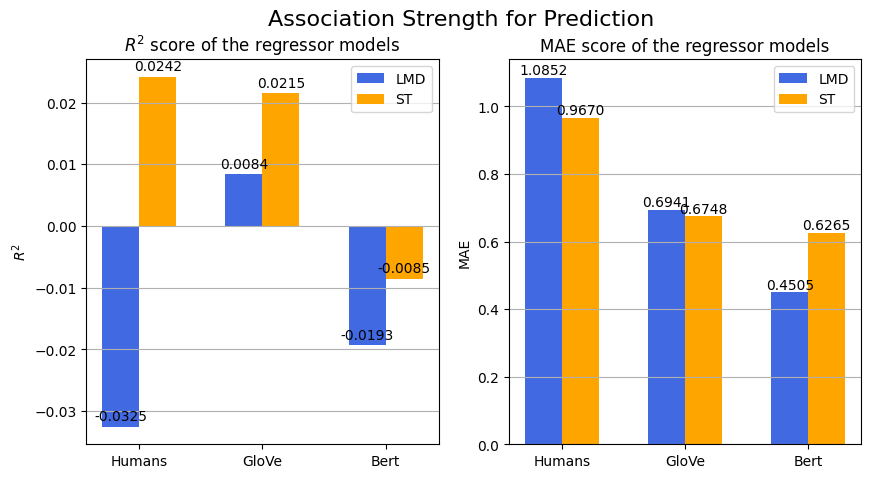

In [12]:
# Plot R^2 and MAE in 2 plots and add the values as labels
judges = ['Humans', 'GloVe', 'Bert']
n_bars = 3
width = 0.6 - n_bars * 0.1

plt.figure(figsize=(10,5))
plt.suptitle('Association Strength for Prediction', fontsize=16)

#   R^2
plt.subplot(1, 2, 1)
plt.bar(range(n_bars), [lmd_r2, glove_lmd_r2, bert_lmd_r2], width=width, color='royalblue', label='LMD')
for i, v in enumerate([lmd_r2, glove_lmd_r2, bert_lmd_r2]):
    plt.text(i, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')

plt.bar([x + width for x in range(n_bars)], [st_r2, glove_st_r2, bert_st_r2], width=width, color='orange', label='ST')
for i, v in enumerate([st_r2, glove_st_r2, bert_st_r2]):
    plt.text(i + width, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')
plt.xticks([x + width / 2 for x in range(n_bars)], judges)
plt.grid(axis = 'y')
plt.ylabel(r'$R^2$')
plt.title(r'$R^2$ score of the regressor models')
plt.legend()

#   MAE
plt.subplot(1, 2, 2)
plt.bar(range(n_bars), [lmd_mae, glove_lmd_mae, bert_lmd_mae], width=width, color='royalblue', label='LMD')
for i, v in enumerate([lmd_mae, glove_lmd_mae, bert_lmd_mae]):
    plt.text(i, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')

plt.bar([x + width for x in range(n_bars)], [st_mae, glove_st_mae, bert_st_mae], width=width, color='orange', label='ST')
for i, v in enumerate([st_mae, glove_st_mae, bert_st_mae]):
    plt.text(i + width, v + 0.0005, f"{v:.4f}", ha='center', va='bottom')
plt.xticks([x + width / 2 for x in range(n_bars)], judges)
plt.grid(axis = 'y')
plt.ylabel(r'MAE')
plt.title(r'MAE score of the regressor models')
plt.legend()
plt.show()


### Saving Regressor's results

In [13]:
# Predicting human judgements
association_lmd_pred = association_lmd_model.predict(
    compounds_df[['association']]
)
association_st_pred = association_st_model.predict(
    compounds_df[['association']]
)

# Predicting values from Glove embeddings
association_glove_lmd_pred = association_glove_lmd_model.predict(
    compounds_df[['association']]
)
association_glove_st_pred = association_glove_st_model.predict(
    compounds_df[['association']]
)

# Predicting values from Bert embeddings
association_bert_lmd_pred = association_bert_lmd_model.predict(
    compounds_df[['association']]
)
association_bert_st_pred = association_bert_st_model.predict(
    compounds_df[['association']]
)

In [14]:
# Saving to a CSV file
predictions_df = pd.DataFrame(
    data={
        'Compound' : compounds_df['Compound'].values,
        'left' : compounds_df['left'].values,
        'right' : compounds_df['right'].values,
        'a_TRAN' : association_st_pred,
        'a_LMD' : association_lmd_pred,
        'a_glove_TRAN' : association_glove_st_pred,
        'a_glove_LMD' : association_glove_lmd_pred,
        'a_bert_TRAN' : association_bert_st_pred,
        'a_bert_LMD' : association_bert_lmd_pred
    }
)
predictions_df.head()

,Compound,left,right,a_TRAN,a_LMD,a_glove_TRAN,a_glove_LMD,a_bert_TRAN,a_bert_LMD
0,aboveground,above,ground,4.439398,4.96291,1.843415,5.002979,4.317515,4.735517
1,airbase,air,base,4.439398,4.96291,1.843415,5.002979,4.317515,4.735517
2,airborne,air,borne,4.439398,4.96291,1.843415,5.002979,4.317515,4.735517
3,aircraft,air,craft,4.484966,4.96291,1.863831,4.997164,4.317515,4.735517
4,airfield,air,field,4.439398,4.96291,1.843415,5.002979,4.317515,4.735517


In [15]:
predictions_df.to_csv('data/predictions/assocation.csv')